## Data: Hyperspectral Remote Sensing Scenes
> http://www.ehu.eus/ccwintco/index.php?title=Hyperspectral_Remote_Sensing_Scenes

**Indian Pines**

This scene was gathered by AVIRIS sensor over the Indian Pines test site in North-western Indiana and consists of $145\times145$ pixels and 224 spectral reflectance bands in the wavelength range 0.4–2.5 10^(-6) meters. This scene is a subset of a larger one. The Indian Pines scene contains two-thirds agriculture, and one-third forest or other natural perennial vegetation. There are two major dual lane highways, a rail line, as well as some low density housing, other built structures, and smaller roads. Since the scene is taken in June some of the crops present, corn, soybeans, are in early stages of growth with less than 5% coverage. The ground truth available is designated into sixteen classes and is not all mutually exclusive. We have also reduced the number of bands to 200 by removing bands covering the region of water absorption: [104-108], [150-163], 220. Indian Pines data are available through Pursue's univeristy MultiSpec site.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
from scipy.io import loadmat
indian_pines = loadmat('dataset/Indian_pines_corrected.mat')

In [3]:
# loadmat方法加载数据后会返回一个Python字典的数据结构
indian_pines.keys()

dict_keys(['__header__', '__version__', '__globals__', 'indian_pines_corrected'])

In [4]:
# 由关键字可知，读取'indian_pines_corrected'字段
indian_pines = indian_pines['indian_pines_corrected']
indian_pines.shape

(145, 145, 200)

In [5]:
indian_pines.size

4205000

In [6]:
# numpy.ndarray类型
type(indian_pines)

numpy.ndarray

In [7]:
indian_pines[:,:,0].shape

(145, 145)

In [8]:
indian_pines.max()

9604

In [9]:
indian_pines.min()

955

In [10]:
indian_pines

array([[[3172, 4142, 4506, ..., 1057, 1020, 1020],
        [2580, 4266, 4502, ..., 1064, 1029, 1020],
        [3687, 4266, 4421, ..., 1061, 1030, 1016],
        ...,
        [2570, 3890, 4320, ..., 1042, 1021, 1015],
        [3170, 4130, 4320, ..., 1054, 1024, 1020],
        [3172, 3890, 4316, ..., 1043, 1034, 1016]],

       [[2576, 4388, 4334, ..., 1047, 1030, 1006],
        [2747, 4264, 4592, ..., 1055, 1039, 1015],
        [2750, 4268, 4423, ..., 1047, 1026, 1015],
        ...,
        [3859, 4512, 4605, ..., 1056, 1035, 1015],
        [3686, 4264, 4690, ..., 1051, 1012, 1020],
        [2744, 4268, 4597, ..., 1047, 1019, 1016]],

       [[2744, 4146, 4416, ..., 1055, 1029, 1025],
        [2576, 4389, 4416, ..., 1051, 1021, 1011],
        [2744, 4273, 4420, ..., 1068, 1033, 1010],
        ...,
        [2570, 4266, 4509, ..., 1051, 1025, 1010],
        [2576, 4262, 4496, ..., 1047, 1029, 1020],
        [2742, 4142, 4230, ..., 1042, 1025, 1011]],

       ...,

       [[3324, 3728, 400

In [11]:
indian_pines_gt = loadmat('dataset/Indian_pines_gt.mat')
print(indian_pines_gt.keys())

dict_keys(['__header__', '__version__', '__globals__', 'indian_pines_gt'])


In [12]:
indian_pines_gt = indian_pines_gt['indian_pines_gt']
indian_pines_gt.shape

(145, 145)

In [13]:
indian_pines_gt

array([[3, 3, 3, ..., 0, 0, 0],
       [3, 3, 3, ..., 0, 0, 0],
       [3, 3, 3, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [14]:
np.unique(indian_pines_gt)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16],
      dtype=uint8)

In [15]:
df_indian_pines_gt = pd.DataFrame(indian_pines_gt)
df_indian_pines_gt

,0,1,2,3,4,5,6,7,8,9,...,135,136,137,138,139,140,141,142,143,144
0,3,3,3,3,3,3,3,3,3,3,...,0,0,0,0,0,0,0,0,0,0
1,3,3,3,3,3,3,3,3,3,3,...,0,0,0,0,0,0,0,0,0,0
2,3,3,3,3,3,3,3,3,3,3,...,0,0,0,0,0,0,0,0,0,0
3,3,3,3,3,3,3,3,3,3,3,...,0,0,0,0,0,0,0,0,0,0
4,3,3,3,3,3,3,3,3,3,3,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
141,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
142,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
143,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
df_indian_pines_gt.to_csv("df_indian_pines_gt.csv", index = False)

In [17]:
indian_pines_gt.ravel().shape

(21025,)

## 读取数据

In [18]:
X = indian_pines
y = indian_pines_gt
print(f"X shape: {X.shape}\ny shape: {y.shape}")

X shape: (145, 145, 200)
y shape: (145, 145)


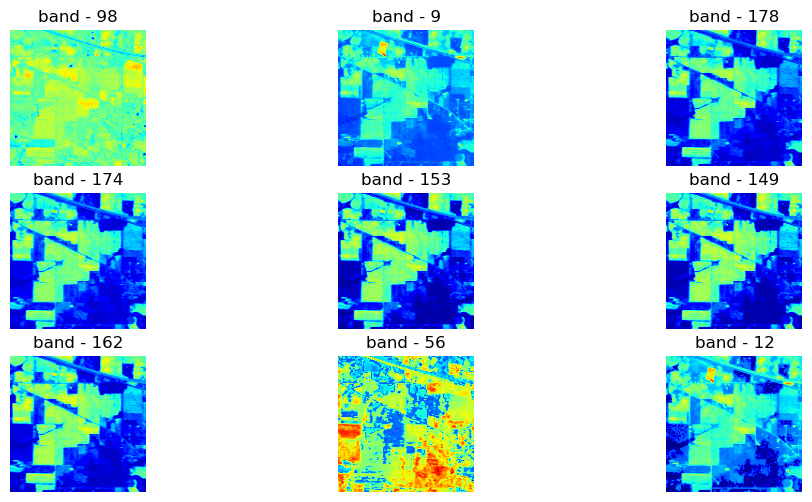

In [27]:
import seaborn as sns
sns.axes_style('whitegrid')
fig = plt.figure(figsize=(12, 6))

for i in range(1, 1+9):
    fig.add_subplot(3, 3, i)
    q = np.random.randint(X.shape[2])
    plt.imshow(X[:, :, q], cmap='jet')
    plt.axis('off')
    plt.title(f'band - {q}')

plt.savefig('test.png')

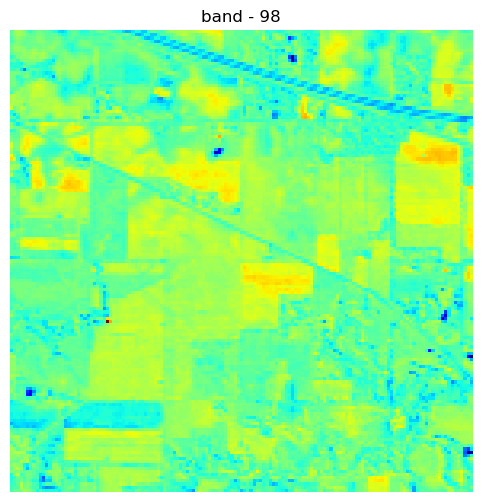

In [30]:
import seaborn as sns
sns.axes_style('whitegrid')
fig = plt.figure(figsize=(12, 6))

for i in range(1, 1+1):
    fig.add_subplot(1, 1, i)
    q = 98
    plt.imshow(X[:, :, q], cmap='jet')
    plt.axis('off')
    plt.title(f'band - {q}')


In [38]:
X[:, :, 98].max()

3663

### 查看图像的真实标注

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: E:\ProgramData\anaconda3\python.exe -m pip install --upgrade pip


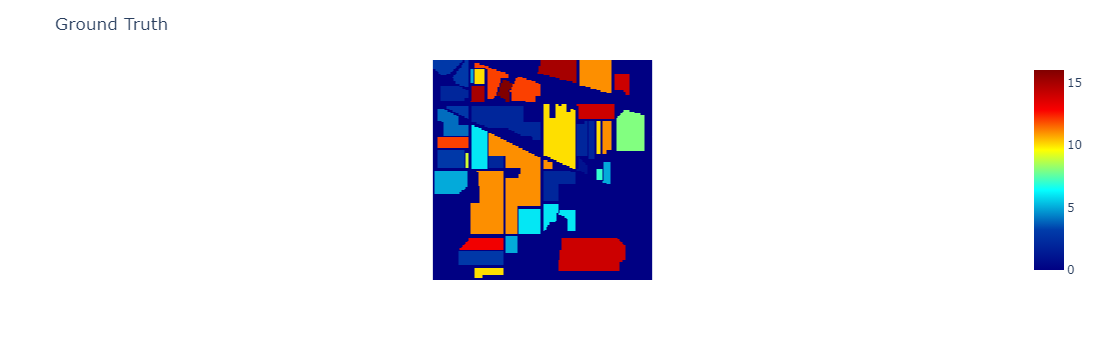

In [39]:
!pip install plotly
import plotly.express as px

cls = px.imshow(y, color_continuous_scale='jet')

cls.update_layout(title='Ground Truth', coloraxis_showscale=True)
cls.update_xaxes(showticklabels=False)
cls.update_yaxes(showticklabels=False)
cls.show()

In [43]:
y.shape

(145, 145)

### 将图像转换为CSV存储

In [38]:
def extract_pixels(X, y, save_name='indian_pines_all'):
    q = X.reshape(-1, X.shape[2])
    df = pd.DataFrame(q)
    df = pd.concat([df, pd.DataFrame(y.ravel())], axis=1)
    df.columns= [f'band{i}' for i in range(1, 1+X.shape[2])]+['class']
    df.to_csv(f'dataset/{save_name}.csv', index=False)
    
    return df

In [39]:
df = extract_pixels(X, y, save_name='indian_pines_all')
df

,band1,band2,band3,band4,band5,band6,band7,band8,band9,band10,...,band192,band193,band194,band195,band196,band197,band198,band199,band200,class
0,3172,4142,4506,4279,4782,5048,5213,5106,5053,4750,...,1094,1090,1112,1090,1062,1069,1057,1020,1020,3
1,2580,4266,4502,4426,4853,5249,5352,5353,5347,5065,...,1108,1104,1117,1091,1079,1085,1064,1029,1020,3
2,3687,4266,4421,4498,5019,5293,5438,5427,5383,5132,...,1111,1114,1114,1100,1065,1092,1061,1030,1016,3
3,2749,4258,4603,4493,4958,5234,5417,5355,5349,5096,...,1122,1108,1109,1109,1071,1088,1060,1030,1006,3
4,2746,4018,4675,4417,4886,5117,5215,5096,5098,4834,...,1110,1107,1112,1094,1072,1087,1052,1034,1019,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21020,2561,3987,4011,4023,4201,4377,4418,4248,4180,3838,...,1013,1012,1018,1015,1011,1001,1000,1009,1008,0
21021,2726,4104,4024,3880,4210,4377,4413,4174,4229,3900,...,1012,1014,1012,1024,998,1010,1006,1000,1000,0
21022,3153,3864,4282,3889,4310,4372,4375,4208,4096,3878,...,1016,1015,1016,1021,1008,1019,1003,1008,1000,0
21023,3155,4104,4106,4027,4139,4318,4413,4174,4140,3933,...,1005,1011,1008,1012,1014,1007,1011,1005,1003,0


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21025 entries, 0 to 21024
Columns: 201 entries, band1 to class
dtypes: uint16(200), uint8(1)
memory usage: 8.0 MB


In [41]:
df.iloc[:, :-1].describe()

,band1,band2,band3,band4,band5,band6,band7,band8,band9,band10,...,band191,band192,band193,band194,band195,band196,band197,band198,band199,band200
count,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,...,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000,21025.000000
mean,2957.363472,4091.321237,4277.502259,4169.956671,4516.678668,4790.595149,4848.317574,4714.732509,4668.904828,4439.065541,...,1079.310773,1061.927848,1060.210273,1063.276813,1050.048514,1040.201141,1043.370321,1030.194816,1015.571463,1008.513579
std,354.918708,230.390005,257.827640,280.761254,346.035984,414.382138,469.247667,491.728349,533.232855,539.908195,...,49.943791,38.843805,38.712195,41.920969,34.242725,26.452672,29.794418,20.865106,11.386402,7.050921
min,2560.000000,2709.000000,3649.000000,2810.000000,3840.000000,4056.000000,4004.000000,3865.000000,3775.000000,2792.000000,...,998.000000,998.000000,999.000000,999.000000,993.000000,990.000000,992.000000,989.000000,986.000000,981.000000
25%,2602.000000,3889.000000,4066.000000,3954.000000,4214.000000,4425.000000,4421.000000,4263.000000,4173.000000,3940.000000,...,1031.000000,1026.000000,1024.000000,1024.000000,1019.000000,1016.000000,1016.000000,1012.000000,1006.000000,1004.000000
50%,2780.000000,4106.000000,4237.000000,4126.000000,4478.000000,4754.000000,4808.000000,4666.000000,4632.000000,4404.000000,...,1068.000000,1053.000000,1052.000000,1054.000000,1043.000000,1033.000000,1035.000000,1026.000000,1014.000000,1009.000000
75%,3179.000000,4247.000000,4479.000000,4350.000000,4772.000000,5093.000000,5198.000000,5100.000000,5084.000000,4860.000000,...,1129.000000,1099.000000,1098.000000,1104.000000,1083.000000,1066.000000,1072.000000,1050.000000,1024.000000,1014.000000
max,4536.000000,5744.000000,6361.000000,6362.000000,7153.000000,7980.000000,8284.000000,8128.000000,8194.000000,7928.000000,...,1364.000000,1287.000000,1289.000000,1315.000000,1258.000000,1201.000000,1245.000000,1167.000000,1076.000000,1036.000000


## PCA

由于HSI数据集具有较高的维度，因此难以处理庞大的数据。 因此，使用主成分分析（PCA）将数据的维数缩减为3D，这是一种流行且广泛使用的降维技术。 以下代码用于将数据集的尺寸减少为三个。

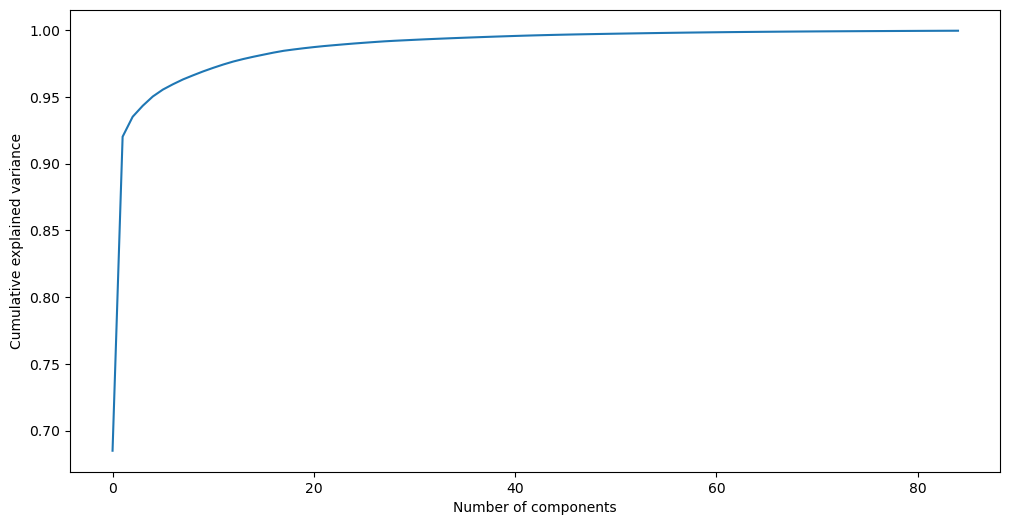

In [42]:
from sklearn.decomposition import PCA

pca_components = 85

pca = PCA(n_components = pca_components)
data = df.iloc[:, :-1].values
dt = pca.fit_transform(data)

ev=pca.explained_variance_ratio_

plt.figure(figsize=(12, 6))
plt.plot(np.cumsum(ev))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

plt.show()

In [43]:
pca_components = 40

pca = PCA(n_components = pca_components)
dt = pca.fit_transform(df.iloc[:, :-1].values)
q = pd.concat([pd.DataFrame(data = dt), pd.DataFrame(data = y.ravel())], axis = 1)
q.columns = [f'PC-{i}' for i in range(1, pca_components+1)]+['class']
q.head()

,PC-1,PC-2,PC-3,PC-4,PC-5,PC-6,PC-7,PC-8,PC-9,PC-10,...,PC-32,PC-33,PC-34,PC-35,PC-36,PC-37,PC-38,PC-39,PC-40,class
0,5014.905985,1456.863260,72.697049,71.204930,-435.686991,-68.840283,134.809699,-304.372475,256.433237,-66.631002,...,19.297486,-1.626073,20.909611,-20.185614,-29.012261,-21.752354,-1.567855,63.292148,16.976503,3
1,5601.383743,-2023.450087,350.134661,-528.465052,148.088294,-288.359016,202.956824,240.847991,-474.857815,93.493749,...,100.938779,-80.642310,-51.257077,29.687778,13.921917,25.119874,2.374562,15.883157,44.330189,3
2,5796.135442,-3090.394852,490.539930,-760.214346,259.933298,-131.611174,172.927264,205.911209,572.492028,-191.621937,...,35.546478,-36.797543,-15.234341,20.045232,35.979564,20.080509,20.854717,-35.249413,89.552522,3
3,5586.204575,-2369.376085,356.274720,-502.687155,146.554946,-306.679324,251.071050,234.966374,-314.023259,54.962212,...,130.048476,-64.935342,32.983302,21.424655,66.746506,14.261168,49.602087,2.857111,61.414517,3
4,5020.990792,339.603390,-23.007525,-92.556768,-368.495441,-438.266713,502.715430,-345.536589,-188.352725,-67.506100,...,-83.396796,72.932702,183.228308,-9.228785,-13.589269,11.306881,-0.996172,61.717486,13.610243,3


### 可视化PCA之后的光谱图

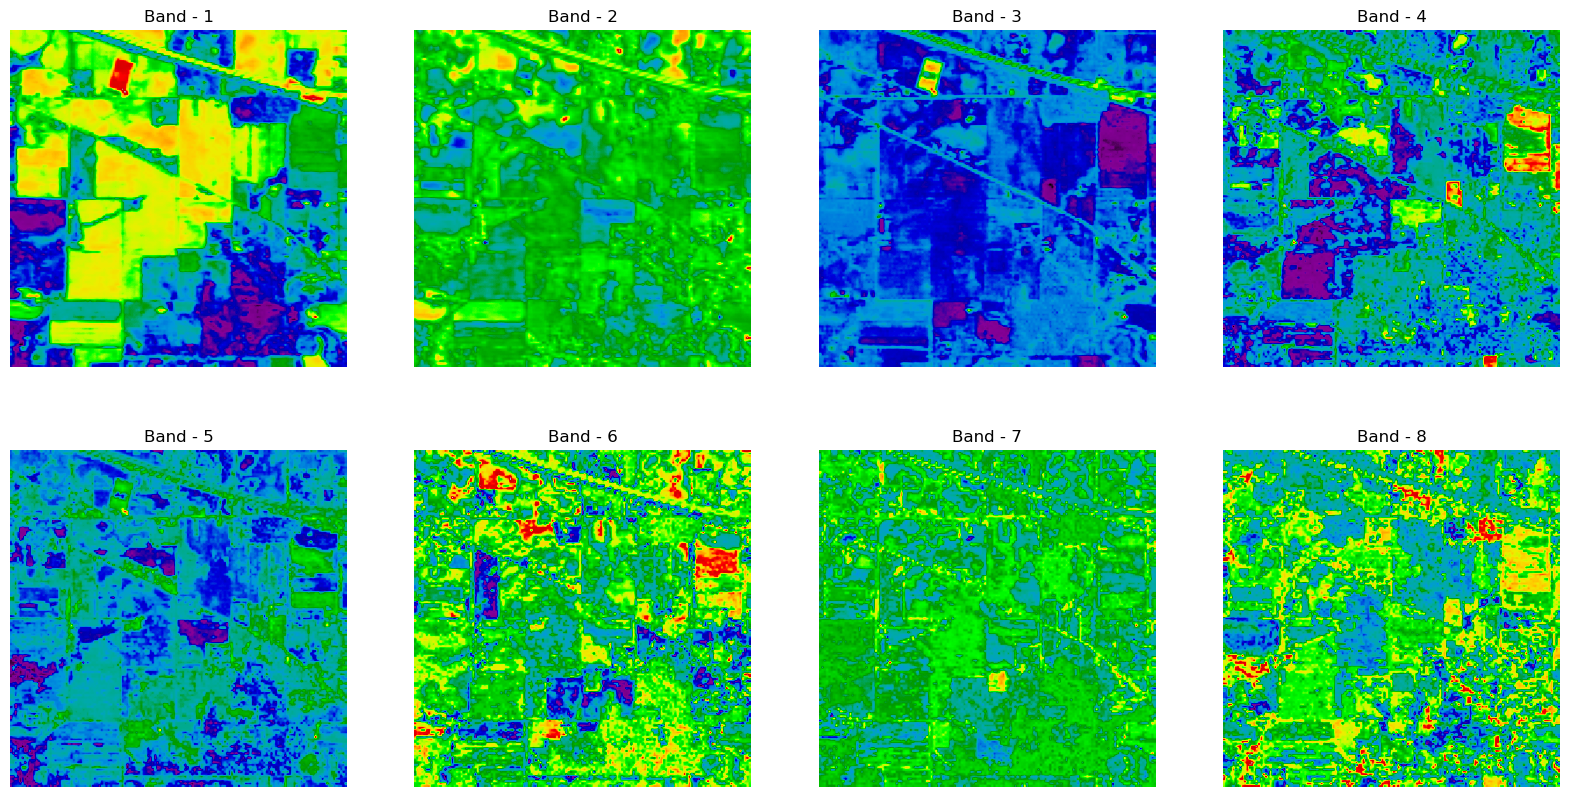

In [46]:
fig = plt.figure(figsize = (20, 10))

for i in range(1, 1+8):
    fig.add_subplot(2,4, i)
    plt.imshow(q.loc[:, f'PC-{i}'].values.reshape(145, 145), cmap='nipy_spectral')
    plt.axis('off')
    plt.title(f'Band - {i}')

plt.savefig('IP_PCA_Bands.png')

In [26]:
# saving to .csv
q.to_csv('IP_40_PCA.csv', index=False)

## SVM

In [47]:
x = q[q['class'] != 0]
X = x.iloc[:, :-1].values
y = x.loc[:, 'class'].values 

names = ['Alfalfa', 'Corn-notill', 'Corn-mintill', 'Corn', 'Grass-pasture', 'Grass-trees',
         'Grass-pasture-mowed', 'Hay-windrowed', 'Oats', 'Soybean-notill', 'Soybean-mintill',
         'Soybean-clean', 'Wheat', 'Woods', 'Buildings Grass Trees Drives', 'Stone Steel Towers']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=11, stratify=y)

svm = SVC(C=100, kernel='rbf', cache_size=10*1024)
svm.fit(X_train, y_train)
ypred = svm.predict(X_test)

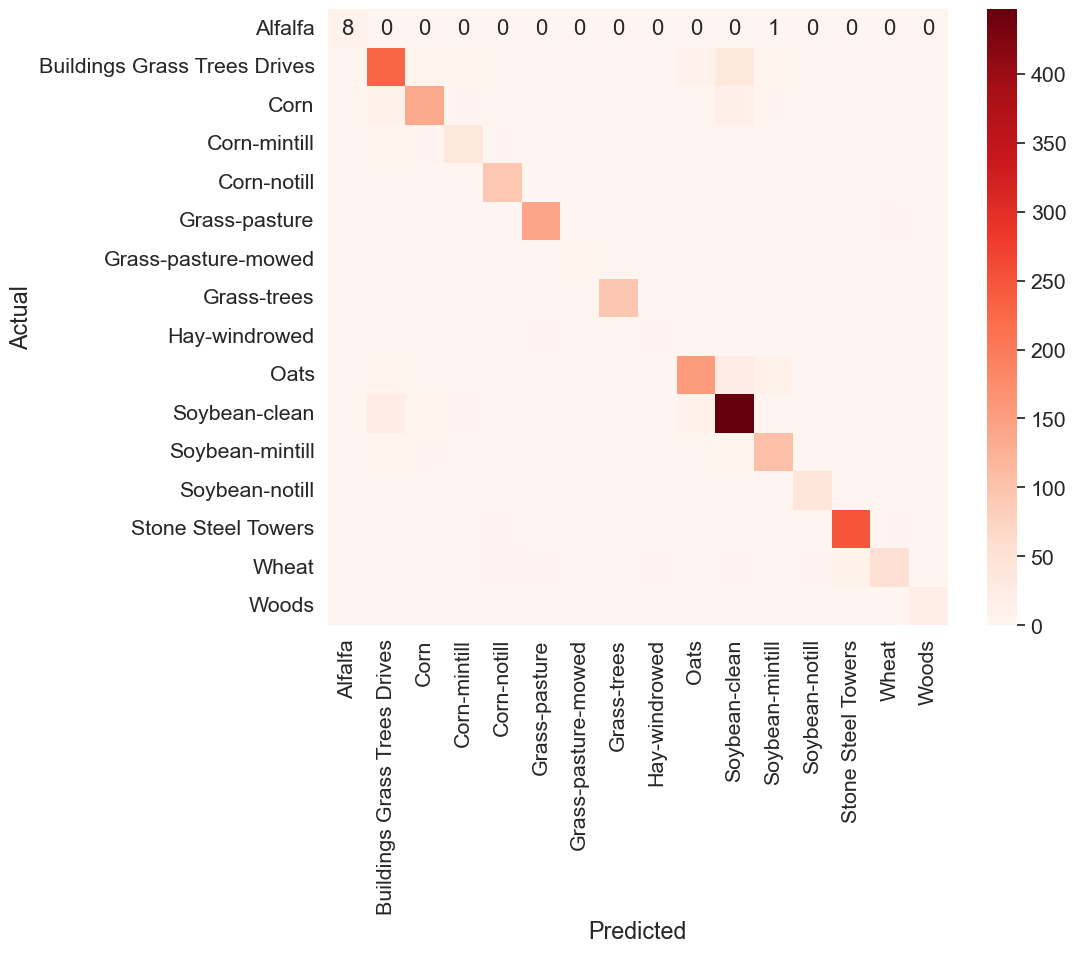

In [48]:
data = confusion_matrix(y_test, ypred)
df_cm = pd.DataFrame(data, columns=np.unique(names), index = np.unique(names))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'

plt.figure(figsize = (10,8))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Reds", annot=True,annot_kws={"size": 16}, fmt='d')

plt.savefig('cmap.png', dpi=300)

In [49]:
print(classification_report(y_test, ypred, target_names = names))

                              precision    recall  f1-score   support

                     Alfalfa       1.00      0.89      0.94         9
                 Corn-notill       0.83      0.80      0.81       286
                Corn-mintill       0.88      0.81      0.85       166
                        Corn       0.79      0.81      0.80        47
               Grass-pasture       0.92      0.96      0.94        97
                 Grass-trees       0.96      0.98      0.97       146
         Grass-pasture-mowed       1.00      0.80      0.89         5
               Hay-windrowed       0.99      1.00      0.99        96
                        Oats       0.50      0.50      0.50         4
              Soybean-notill       0.88      0.80      0.84       194
             Soybean-mintill       0.84      0.91      0.88       491
               Soybean-clean       0.85      0.89      0.87       119
                       Wheat       0.95      1.00      0.98        41
                   

In [50]:
# Classification Map
l=[]
for i in range(q.shape[0]):
    if q.iloc[i, -1] == 0:
        l.append(0)
    else:
        l.append(svm.predict(q.iloc[i, :-1].values.reshape(1, -1)))

clmap = np.array(l).reshape(145, 145).astype('float')
plt.figure(figsize=(10, 8))
plt.imshow(clmap, cmap='nipy_spectral')
plt.colorbar()
plt.axis('off')
plt.savefig('IP_cmap.png')
plt.show()

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (21025,) + inhomogeneous part.

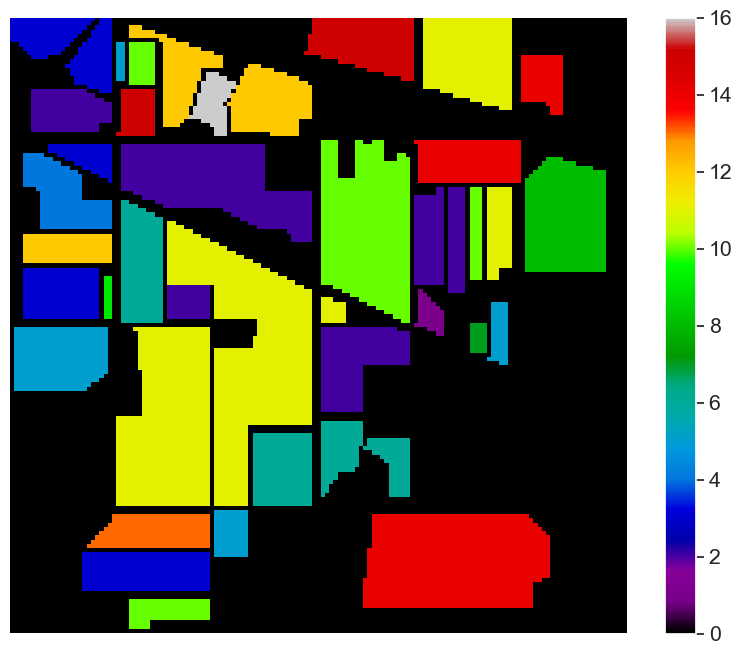

In [51]:
# 真实数据
y = indian_pines_gt

plt.figure(figsize=(10, 8))
plt.imshow(y, cmap='nipy_spectral')
plt.colorbar()
plt.axis('off')
plt.savefig('IP_cmap.png')
plt.show()

## 可视化

In [33]:
class_labels = {'1':'Alfalfa',
                '2':'Corn-notill',
                '3':'Corn-mintill',
                '4':'Corn',
                '5':'Grass-pasture',
                '6':'Grass-trees',
                '7':'Grass-pasture-mowed',
                '8':'Hay-windrowed',
                '9':'Oats',
                '10':'Soybean-notill',
                '11':'Soybean-mintill',
                '12':'Soybean-clean',
                '13':'Wheat',
                '14':'Woods',
                '15':'Buildings-Grass-Trees-Drives',
                '16':'Stone-Steel-Towers',
               }

In [34]:
q2 = q[q['class'] != 0]
# 添加真实标签列：将数值标签映射到对应的真实标签
q2['label'] = q2.loc[:, 'class'].apply(lambda x: class_labels[str(x)])

<ipython-input-34-0a8b1d317e42>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [35]:
q2['label'].value_counts()

Soybean-mintill                 2455
Corn-notill                     1428
Woods                           1265
Soybean-notill                   972
Corn-mintill                     830
Grass-trees                      730
Soybean-clean                    593
Grass-pasture                    483
Hay-windrowed                    478
Buildings-Grass-Trees-Drives     386
Corn                             237
Wheat                            205
Stone-Steel-Towers                93
Alfalfa                           46
Grass-pasture-mowed               28
Oats                              20
Name: label, dtype: int64

In [36]:
q2.head()

,PC-1,PC-2,PC-3,PC-4,PC-5,PC-6,PC-7,PC-8,PC-9,PC-10,...,PC-33,PC-34,PC-35,PC-36,PC-37,PC-38,PC-39,PC-40,class,label
0,5014.905985,1456.863260,72.697049,71.204923,-435.686983,-68.840322,134.809960,-304.372382,256.432916,-66.631241,...,-2.087652,19.324919,-20.379733,-31.967830,24.950066,9.793769,60.045044,6.785895,3,Corn-mintill
1,5601.383743,-2023.450087,350.134661,-528.465051,148.088301,-288.359072,202.956878,240.848032,-474.857833,93.493916,...,-80.829394,-52.038015,28.377927,15.215805,-21.208236,3.656814,16.922263,40.503381,3,Corn-mintill
2,5796.135442,-3090.394852,490.539929,-760.214339,259.933316,-131.611269,172.927306,205.911216,572.492138,-191.621575,...,-35.791325,-14.523947,24.978625,40.849205,-13.039982,13.416839,-24.955699,85.329983,3,Corn-mintill
3,5586.204575,-2369.376085,356.274719,-502.687147,146.554961,-306.679407,251.071108,234.966361,-314.023032,54.962648,...,-64.390988,33.906805,22.797941,69.549327,-5.419173,48.688475,4.351452,56.446325,3,Corn-mintill
4,5020.990792,339.603390,-23.007525,-92.556765,-368.495437,-438.266743,502.715413,-345.536625,-188.352699,-67.505815,...,72.710402,182.713587,-7.280528,-15.942491,-12.493091,4.693330,61.942322,12.091971,3,Corn-mintill


In [37]:
import plotly.express as px
count = q2['class'].value_counts()
bar_fig = px.bar(x=count.index[1:], y=count[1:], labels=class_labels, color=count.index[1:])
bar_fig.update_layout(xaxis = dict(title='Class', 
                                   tickmode='array', 
                                   tickvals=count.index[1:].tolist(), 
                                   tickangle = 45,
                                  ),
                      yaxis = dict(title='count',),
                      showlegend=True
                     )
bar_fig.show()

In [38]:
q2['label'].value_counts().min()

20

In [39]:
# 重采样一部分样本以便可视化
# sampling dataset
sample_size = q2['label'].value_counts().min()
sample = q2.groupby('class').apply(lambda x: x.sample(sample_size))
sample

PC-1         PC-2         PC-3         PC-4         PC-5  \
class                                                                           
1     9960   -1258.242347  -221.795535 -1772.820908  1581.591845   116.936124   
      10684   -650.063218 -1458.941416 -1343.767812  1687.124514   254.217535   
      10246   -144.324416 -1106.422012 -1268.882530  1848.727540    40.686885   
      10537   -424.556637 -1587.155939 -1276.787212  1976.996619   -56.038895   
      9813    -568.285420  -565.755854 -1717.683764  1053.675436    55.657922   
...                   ...          ...          ...          ...          ...   
16    2948    9861.528986 -9740.918214  2013.707162  1098.679666  -883.929620   
      3090   11182.501757  1280.834291  5295.781439   727.062238  1320.814377   
      2511   10471.885578 -1393.529829  4255.726827   732.314765   874.247615   
      2805   10199.041158 -3493.005125  2979.417810   550.141832   459.924421   
      2370   10804.150489   553.232487  4855.038720   736.213315  1068.836621   

                   PC-6        PC-7        PC-8        PC-9       PC-10  ...  \
class                                                                    ...   
1     9960   586.939864  225.628522  530.064765   19.371166  345.266790  ...   
      10684  546.420845 -192.407132  480.104943  513.456338 -922.520601  ...   
      10246  483.547424 -207.368562  480.782974 -368.895969 -704.154887  ...   
      10537  469.875309 -263.088491  496.172732 -557.784117 -705.699728  ...   
      9813   525.323408 -298.720781  395.259727 -208.300823   63.760055  ...   
...                 ...         ...         ...         ...         ...  ...   
16    2948  -525.589582  436.227053   76.336640  496.823585  215.638098  ...   
      3090   416.842265 -107.294682 -353.442852  514.817580  -10.891054  ...   
      2511   280.131029  -26.190203 -334.119170  572.415707  -83.847182  ...   
      2805   -38.408373  391.529383 -331.912312  643.783187 -268.068806  ...   
      2370   433.238314 -199.569596 -292.304966  385.067900  -86.437938  ...   

                  PC-33       PC-34       PC-35       PC-36       PC-37  \
class                                                                     
1     9960   -85.075108   20.975974    4.017001  -45.116533   11.458624   
      10684  -26.975988 -116.297374   72.240752  -15.784503  144.605589   
      10246  138.024480  116.916632   94.136707  -19.758643   67.883315   
      10537  127.074044   52.005122   92.603300  -70.036822    8.261961   
      9813  -150.305462  -29.426900    2.113784 -189.181855  135.146681   
...                 ...         ...         ...         ...         ...   
16    2948    11.052973   -8.990494  -16.069736  -15.574945  -47.047859   
      3090   859.120008  -61.604939 -216.436022  -19.258468   82.506687   
      2511  -496.542611  168.002089  165.363796    7.365021   -4.314666   
      2805    24.385992  112.418261  -61.381219    4.742844   59.226252   
      2370   488.469844  -94.759952 -111.980844   -9.912846  240.441316   

                  PC-38       PC-39       PC-40  class               label  
class                                                                       
1     9960   175.056116  -25.914378    0.245609      1             Alfalfa  
      10684  -30.123747  -30.194587  122.121994      1             Alfalfa  
      10246   15.276152   19.936361   27.522411      1             Alfalfa  
      10537  -58.669195   37.238352   17.804889      1             Alfalfa  
      9813   162.974046 -134.897681  161.863182      1             Alfalfa  
...                 ...         ...         ...    ...                 ...  
16    2948   101.335921  -48.649776  141.408877     16  Stone-Steel-Towers  
      3090  -139.197388 -123.470355  -30.008507     16  Stone-Steel-Towers  
      2511   246.184867  -11.587444 -280.886934     16  Stone-Steel-Towers  
      2805    22.954775   13.692435   18.267319     16  Stone-Steel-Towers  
      2370  -154.215123  -

In [40]:
# !pip install chart_studio
# import chart_studio.plotly as py

In [41]:
fig = px.scatter(sample, x="PC-1", y="PC-2", size="class", color="label",
                 hover_name="label", log_x=True, size_max=12)
fig.show()

In [42]:
# Box Plot
fig = px.violin(sample, y="PC-1", x="PC-2", color="label", 
                      box=True, points="all", hover_data=['PC-1', 'PC-2', 'PC-3','label'])
fig.show()

In [43]:
scatter_3d = px.scatter_3d(sample, x="PC-1", y="PC-2", z="PC-3", 
                           color="label", size="class", hover_name="label",symbol="label")
# color_discrete_map = {"Joly": "blue", "Bergeron": "green", "Coderre":"red"})
scatter_3d.show()
# py.plot(scatter_3d, filename = 'scatter_3d', auto_open=True)

堆叠面积图适用于可视化“部分-整体”的关系，这有助于展现各分类及总体的发展趋势和相互之间的关系。

层叠面积图上最大的面积代表了所有数据量的总和，是一个整体。各个叠起来的面积表示各个数据量的大小，这些堆叠起来的面积图在表现大数据的总分量的变化情况时格外有用，所以层叠面积图非常适用于对比多变量随时间变化的情况。层叠面积图并不能反映总量的变化，但是可以清晰的反应每个数值所占百分比随时间或类别变化的趋势线，这对于分析自变量是大数据、时变数据、有序数据时各个指标分量占比极为有用。


> ref:https://www.edrawsoft.cn/what-is-area-chart/mianjitu

In [44]:
area_plt1 = px.area(sample, x="PC-1", y="PC-2", color="label", line_group="label")
area_plt1.show()
# py.plot(area_plt1, filename = 'area_plt1', auto_open=True)

In [45]:
area_plt2 = px.area(sample, x="PC-1", y="PC-3", color="label", line_group="label")
area_plt2.show()
# py.plot(area_plt2, filename = 'area_plt2', auto_open=True)

In [46]:
area_plt3 = px.area(sample, x="PC-2", y="PC-3", color="label", line_group="label")
area_plt3.show()
# py.plot(area_plt3, filename = 'area_plt2', auto_open=True)

In [47]:
pair = px.scatter_matrix(sample, dimensions=["PC-1", "PC-2", "PC-3"], color="label")
pair.show()
# py.plot(pair, filename = 'pair_plot_pc', auto_open=True)

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [49]:
np.linspace(-100, 100, 20, dtype=int).shape

(20,)

In [50]:
x = np.linspace(-100, 100, 20, dtype=int)
y = 1.0/(1 + np.exp(-x))

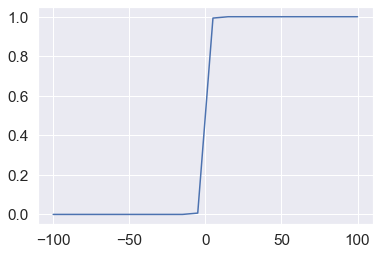

In [51]:
plt.plot(x,y)